## Public Bike Parking in Dublin City

### *Import mandatory libraries*

In [1]:
# libraries for manipulating data
import pandas as pd
import numpy as np

# libraries for visualising data
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warning messages
import warnings
warnings.filterwarnings("ignore")

### 3. Machine learning

In [109]:
# Read the final data
bp_final = pd.read_csv("dublin_bike_parking_stands_final.csv")
bp_final.head()

,stand_type,easting,northing,long,lat,stand_numbers
0,Sheffield Stand,318106.414,234502.185,-6.227256,53.347793,4
1,Sheffield Stand,315620.753,232932.916,-6.265134,53.334248,1
2,Sheffield Stand,316615.570,234148.652,-6.249761,53.344949,2
3,Sheffield Stand,316520.200,234543.281,-6.251047,53.348514,1
4,Sheffield Stand,317119.980,233940.217,-6.242268,53.342965,3


In [110]:
# Add area column to it as our dependent variable
bp_final["area"] = area_geometry["area"]
bp_final

,stand_type,easting,northing,long,lat,stand_numbers,area
0,Sheffield Stand,318106.414,234502.185,-6.227256,53.347793,4,CENTRAL
1,Sheffield Stand,315620.753,232932.916,-6.265134,53.334248,1,SOUTH EAST
2,Sheffield Stand,316615.570,234148.652,-6.249761,53.344949,2,SOUTH EAST
3,Sheffield Stand,316520.200,234543.281,-6.251047,53.348514,1,CENTRAL
4,Sheffield Stand,317119.980,233940.217,-6.242268,53.342965,3,SOUTH EAST
...,...,...,...,...,...,...,...
931,Sheffield Stand,316302.000,233262.000,-6.254792,53.337055,4,SOUTH EAST
932,Sheffield Stand,315695.000,238310.000,-6.262055,53.382523,10,NORTH CENTRAL
933,Sheffield Stand,314313.000,234658.000,-6.284133,53.350025,4,CENTRAL
934,Sheffield Stand,309975.000,233713.000,-6.349573,53.342457,5,SOUTH CENTRAL


In [111]:
# Check missing values
bp_final.isnull().sum()

stand_type       0
easting          0
northing         0
long             0
lat              0
stand_numbers    0
area             3
dtype: int64

- **Missing values appeared again since these three stands are not in the polygons of the 5 areas.**

In [112]:
# Drop missing values
bp_final.dropna(inplace = True)

In [113]:
# Check again
bp_final.isnull().sum()

stand_type       0
easting          0
northing         0
long             0
lat              0
stand_numbers    0
area             0
dtype: int64

- **Install category_encoders to encode categorial data.**

In [114]:
pip install category_encoders

In [115]:
# Import library, encode and rearrange
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols = ["stand_type"], return_df = True,
                  mapping=[{"col":"stand_type", "mapping":
                            {"Sheffield Stand": 1, "Railing": 2, "Stainless Steel Curved": 3, "Hoops": 4,
                            "Temporary Racks": 5, "Cargo bike stands": 6, "Sheffield Stand +Cargo Stand": 7}}])

bp_copy = encoder.fit_transform(bp_final)
ml = bp_copy.copy()
ml = ml.drop(columns = {"easting", "northing"})
ml.head(8) # For machine learning

,stand_type,long,lat,stand_numbers,area
0,1,-6.227256,53.347793,4,CENTRAL
1,1,-6.265134,53.334248,1,SOUTH EAST
2,1,-6.249761,53.344949,2,SOUTH EAST
3,1,-6.251047,53.348514,1,CENTRAL
4,1,-6.242268,53.342965,3,SOUTH EAST
5,1,-6.262076,53.348178,2,CENTRAL
6,1,-6.251759,53.351830,3,CENTRAL
7,1,-6.268155,53.356866,3,CENTRAL


In [116]:
# Extract the values for machine learning, X is independent variables, y is dependent variable
Xnames = ["stand_type", "long", "lat", "stand_numbers"]
X = ml[Xnames].values
y = ml["area"].values

#### 3.1 KNN model

- ***Without scaling***

In [117]:
# Split the data into two parts, one for training, one for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 45)

In [118]:
# Check the shape of splitted data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((699, 4), (234, 4), (699,), (234,))

In [119]:
# Import model
from sklearn.neighbors import KNeighborsClassifier

# Create a range of 20 neighbors for testing and find the best k number
neighbors = np.arange(1, 20)                 
train_accuracy = np.zeros(len(neighbors)) 
test_accuracy = np.zeros(len(neighbors))
print(neighbors, train_accuracy, test_accuracy)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [120]:
# Use iteration function to show the accuracies of each k number in trained and tested sample
for i,k in enumerate(neighbors):  
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
print(neighbors, train_accuracy, test_accuracy)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [1.         0.92131617 0.91559371 0.90414878 0.88268956 0.86266094
 0.86981402 0.84549356 0.84692418 0.8397711  0.82546495 0.83118741
 0.81974249 0.8211731  0.79828326 0.80400572 0.79828326 0.80257511
 0.78111588] [0.84188034 0.83760684 0.77777778 0.78205128 0.74358974 0.75641026
 0.76068376 0.75213675 0.75641026 0.74358974 0.74358974 0.75213675
 0.75213675 0.74786325 0.74358974 0.75213675 0.75641026 0.73504274
 0.75641026]


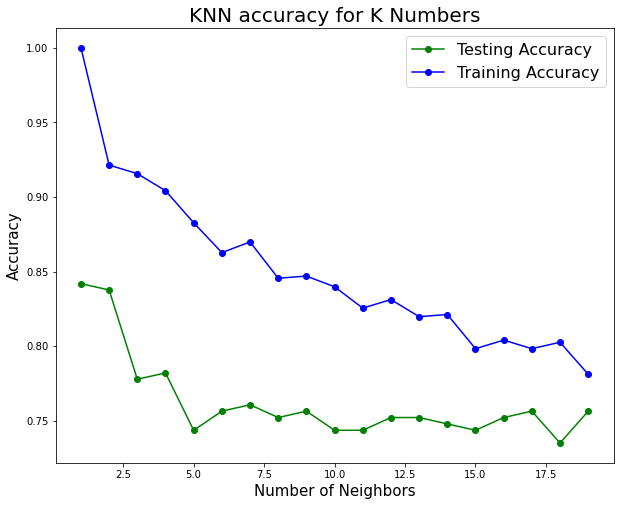

In [121]:
# Plot the accuracies
plt.figure(figsize = (10, 8))
plt.title("KNN accuracy for K Numbers", fontsize = 20)
plt.plot(neighbors, test_accuracy, label = "Testing Accuracy", marker = "o", color = "green")
plt.plot(neighbors, train_accuracy, label = "Training Accuracy", marker = "o", color = "blue")
plt.legend(prop = {"size": 16})
plt.xlabel("Number of Neighbors", fontsize = 15)
plt.ylabel("Accuracy", fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

In [122]:
# Numbers of independent features
X_col = ml[Xnames]
len(X_col.columns)

4

In [123]:
# According to the graph and chose k=18 as our n_neighbors
knn = KNeighborsClassifier(n_neighbors = 18)
knn.fit(X_train, y_train)

# Excute Recursive Feature Elimination
from sklearn.feature_selection import RFE
rfe = RFE(knn, n_features_to_select = 4)             
rfe = rfe.fit(X_train, y_train)

# Calculate accuracies
train_accuracy = knn.score(X_train, y_train)
test_accuracy = knn.score(X_test, y_test)

In [124]:
# tuples of (feature name, whether selected, ranking)
list(zip(X_col.columns, rfe.support_, rfe.ranking_))

[('stand_type', True, 1),
 ('long', True, 1),
 ('lat', True, 1),
 ('stand_numbers', True, 1)]

In [125]:
# Display the accuracies
print(train_accuracy, test_accuracy)

0.8025751072961373 0.7350427350427351


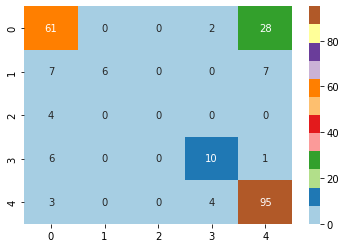

In [126]:
# Check confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = "Paired");

In [127]:
# Show the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

      CENTRAL       0.75      0.67      0.71        91
NORTH CENTRAL       1.00      0.30      0.46        20
   NORTH WEST       0.00      0.00      0.00         4
SOUTH CENTRAL       0.62      0.59      0.61        17
   SOUTH EAST       0.73      0.93      0.82       102

     accuracy                           0.74       234
    macro avg       0.62      0.50      0.52       234
 weighted avg       0.74      0.74      0.71       234



In [128]:
from sklearn import metrics
print("Accuracy without scaling by KNN model: ", round(metrics.accuracy_score(y_test, y_pred), 2))

Accuracy without scaling by KNN model:  0.74


- ***Use standardscaler and excute same procedures above***

In [129]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [130]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = 45)

In [131]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1, 20)                 
train_accuracy = np.zeros(len(neighbors)) 
test_accuracy = np.zeros(len(neighbors))
print(neighbors, train_accuracy, test_accuracy)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [132]:
for i,k in enumerate(neighbors):  
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X1_train, y1_train)
    train_accuracy[i] = knn.score(X1_train, y1_train)
    test_accuracy[i] = knn.score(X1_test, y1_test)
print(neighbors, train_accuracy, test_accuracy)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [1.         0.96566524 0.96423462 0.96137339 0.96280401 0.95851216
 0.95135908 0.94277539 0.94277539 0.93562232 0.94134478 0.93276109
 0.93133047 0.93562232 0.92274678 0.92274678 0.9241774  0.91845494
 0.91845494] [0.92735043 0.93589744 0.93162393 0.94871795 0.94444444 0.94444444
 0.93589744 0.92735043 0.92307692 0.92307692 0.92735043 0.91880342
 0.91452991 0.91025641 0.8974359  0.89316239 0.88034188 0.88461538
 0.87179487]


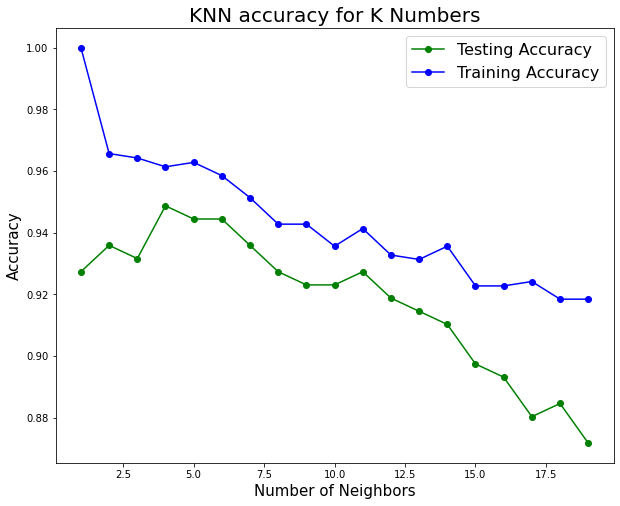

In [133]:
plt.figure(figsize = (10, 8))
plt.title("KNN accuracy for K Numbers", fontsize = 20)
plt.plot(neighbors, test_accuracy, label = "Testing Accuracy", marker = "o", color = "green")
plt.plot(neighbors, train_accuracy, label = "Training Accuracy", marker = "o", color = "blue")
plt.legend(prop = {"size": 16})
plt.xlabel("Number of Neighbors", fontsize = 15)
plt.ylabel("Accuracy", fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

In [134]:
# k=4/6 is our best options in this case
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X1_train, y1_train)
train_accuracy = knn.score(X1_train, y1_train)
test_accuracy = knn.score(X1_test, y1_test)
print(train_accuracy, test_accuracy)

0.9585121602288984 0.9444444444444444


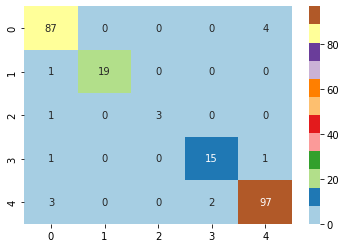

In [135]:
from sklearn.metrics import confusion_matrix
y1_pred = knn.predict(X1_test)
cm1 = confusion_matrix(y1_test, y1_pred)
sns.heatmap(cm1, annot = True, cmap = "Paired");

In [136]:
from sklearn.metrics import classification_report
print(classification_report(y1_test, y1_pred))

               precision    recall  f1-score   support

      CENTRAL       0.94      0.96      0.95        91
NORTH CENTRAL       1.00      0.95      0.97        20
   NORTH WEST       1.00      0.75      0.86         4
SOUTH CENTRAL       0.88      0.88      0.88        17
   SOUTH EAST       0.95      0.95      0.95       102

     accuracy                           0.94       234
    macro avg       0.95      0.90      0.92       234
 weighted avg       0.94      0.94      0.94       234



In [137]:
from sklearn import metrics
print("Accuracy using standardscale with KNN model: ", round(metrics.accuracy_score(y1_test, y1_pred), 2))

Accuracy using standardscale with KNN model:  0.94


#### 3.2 Non-linear SVM

In [138]:
# Import model and libraries
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import scale

- ***Brief look without scaling***

In [139]:
# Import model and split data
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size = 0.25, random_state = 45)

In [140]:
# Create a svm model built on Gaussian Radial Basis Function (rdf) kernel
svm = SVC(kernel = "rbf")

# Train and test the data
svm.fit(X2_train, y2_train)
y2_pred = svm.predict(X2_test)

# Check accuracy
print("Accuracy using rdf kernel without scaling: ", round(metrics.accuracy_score(y2_test, y2_pred), 2))

Accuracy using rdf kernel without scaling:  0.44


- ***The accuracy looks low. Now we changed to scaled data.***

In [141]:
from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = 45)

In [142]:
svm = SVC(kernel = "rbf")
svm.fit(X3_train, y3_train)
y3_pred = svm.predict(X3_test)
print("Accuracy using rdf kernel after standardscaling: ", round(metrics.accuracy_score(y3_test, y3_pred), 2))

Accuracy using rdf kernel after standardscaling:  0.92


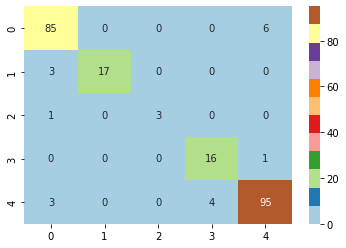

In [143]:
# Plot confusion matrix
cm2 = confusion_matrix(y3_test, y3_pred)
sns.heatmap(cm2, annot = True, cmap = "Paired");

In [144]:
# Show classification report
from sklearn.metrics import classification_report
print(classification_report(y3_test, y3_pred))

               precision    recall  f1-score   support

      CENTRAL       0.92      0.93      0.93        91
NORTH CENTRAL       1.00      0.85      0.92        20
   NORTH WEST       1.00      0.75      0.86         4
SOUTH CENTRAL       0.80      0.94      0.86        17
   SOUTH EAST       0.93      0.93      0.93       102

     accuracy                           0.92       234
    macro avg       0.93      0.88      0.90       234
 weighted avg       0.93      0.92      0.92       234



- Cross validate and find the best C and gamma numbers

In [145]:
# Create a KFold object with 5 splits 
folds = KFold(n_splits = 6, shuffle = True, random_state = 45)

# Specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [{"gamma": [1e-2, 1e-3, 1e-4],
                     "C": [1, 10, 100, 1000]}]


# Specify model
model = SVC(kernel = "rbf")

# Set up GridSearchCV() and fit
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring = "accuracy", 
                        cv = folds, 
                        verbose = 1,
                        return_train_score = True)
model_cv.fit(X2_train, y2_train)

Fitting 6 folds for each of 12 candidates, totalling 72 fits


GridSearchCV(cv=KFold(n_splits=6, random_state=45, shuffle=True),
             estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [146]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mean_fit_time       12 non-null     float64
 1   std_fit_time        12 non-null     float64
 2   mean_score_time     12 non-null     float64
 3   std_score_time      12 non-null     float64
 4   param_C             12 non-null     object 
 5   param_gamma         12 non-null     object 
 6   params              12 non-null     object 
 7   split0_test_score   12 non-null     float64
 8   split1_test_score   12 non-null     float64
 9   split2_test_score   12 non-null     float64
 10  split3_test_score   12 non-null     float64
 11  split4_test_score   12 non-null     float64
 12  split5_test_score   12 non-null     float64
 13  mean_test_score     12 non-null     float64
 14  std_test_score      12 non-null     float64
 15  rank_test_score     12 non-null     int32  
 16  split0_tra

In [147]:
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,0.023004,0.006410,0.010417,0.007366,1,0.01,"{'C': 1, 'gamma': 0.01}",0.57265,0.418803,0.504274,...,0.048335,5,0.465636,0.493127,0.479381,0.485420,0.488851,0.488851,0.483544,0.009034
1,0.018234,0.005820,0.012589,0.009291,1,0.001,"{'C': 1, 'gamma': 0.001}",0.57265,0.427350,0.495726,...,0.046857,6,0.463918,0.493127,0.477663,0.485420,0.487136,0.488851,0.482686,0.009590
2,0.022843,0.006442,0.006709,0.007063,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.57265,0.427350,0.495726,...,0.046857,6,0.462199,0.489691,0.477663,0.481990,0.487136,0.485420,0.480683,0.009108
3,0.051500,0.011239,0.014855,0.001726,10,0.01,"{'C': 10, 'gamma': 0.01}",0.57265,0.418803,0.495726,...,0.048725,11,0.465636,0.493127,0.479381,0.488851,0.490566,0.488851,0.484402,0.009408
4,0.033422,0.011168,0.018230,0.005820,10,0.001,"{'C': 10, 'gamma': 0.001}",0.57265,0.427350,0.504274,...,0.046587,2,0.465636,0.493127,0.479381,0.485420,0.488851,0.488851,0.483544,0.009034


In [148]:
# Print the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.6751645544748993 corresponding to hyperparameters {'C': 1000, 'gamma': 0.01}


In [149]:
# Use the best hyperparameter to test
from sklearn.model_selection import train_test_split
X4_train, X4_test, y4_train, y4_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = 45)

svm1 = SVC(kernel = "rbf", C = 1000, gamma = 0.01)
svm1.fit(X4_train, y4_train)
y4_pred = svm1.predict(X4_test)

# Display the accuracy
print("Accuracy using rbf kernel with the best hyperparameters: ", round(metrics.accuracy_score(y4_test, y4_pred), 2))

Accuracy using rbf kernel with the best hyperparameters:  0.94


In [150]:
print(classification_report(y4_test, y4_pred))

               precision    recall  f1-score   support

      CENTRAL       0.96      0.95      0.95        91
NORTH CENTRAL       1.00      0.95      0.97        20
   NORTH WEST       1.00      0.50      0.67         4
SOUTH CENTRAL       0.80      0.94      0.86        17
   SOUTH EAST       0.94      0.95      0.95       102

     accuracy                           0.94       234
    macro avg       0.94      0.86      0.88       234
 weighted avg       0.94      0.94      0.94       234



- ***Brief look using sigmoid kernel***

In [151]:
from sklearn.model_selection import train_test_split
X5_train, X5_test, y5_train, y5_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = 45)

svm2 = SVC(kernel = "sigmoid", C = 1000, gamma = 0.01)
svm2.fit(X5_train, y5_train)
y5_pred = svm1.predict(X5_test)

# Display the accuracy
print("Accuracy using sigmoid kernel: ", round(metrics.accuracy_score(y5_test, y5_pred), 2))

Accuracy using sigmoid kernel:  0.94


### References

- <p> https://colorbrewer2.org/#type=qualitative&scheme=Paired&n=7 <p>
- <p> https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html?highlight=poisson#scipy.stats.poisson <p>
- <p> https://fontawesome.com/icons/bicycle?s=solid&f=classic <p>
- <p> https://github.com/PacktPublishing/Machine-Learning-with-Real-World-Projects <p>
- <p> https://geopandas.org/en/stable/index.html <p>
- <p> https://machinelearningmastery.com/knn-imputation-for-missing-values-in-machine-learning/ <p>
- <p> https://matplotlib.org/stable/index.html <p>
- <p> https://pandas.pydata.org/docs/index.html <p>
- <p> https://pyproj4.github.io/pyproj/stable/index.html <p>
- <p> https://python-visualization.github.io/folium/quickstart.html#Getting-Started <p>
- <p> https://scikit-learn.org/stable/ <p>
- <p> https://stackoverflow.com/questions/71287607/how-to-make-a-normal-distribution-graph-from-data-frame-in-python <p>
- <p> https://towardsdatascience.com/reverse-geocoding-in-python-a915acf29eb6 <p>
- <p> https://www.datacamp.com/community/tutorials/introduction-machine-learning-python <p>
- <p> https://www.kaggle.com/code/dabaker/fancy-folium <p>
- <p> Peng, J. et al. (2021) ‘DataPrep.EDA: Task-Centric Exploratory Data Analysis for Statistical Modeling in Python’, in Proceedings of the 2021 International Conference on Management of Data. New York, NY, USA: Association for Computing Machinery (SIGMOD ’21), pp. 2271–2280. Available at: https://doi.org/10.1145/3448016.3457330. <p>